Statistics in papers

In [25]:
# First ,change the working directory to the project root dir
import os
import context
os.chdir(context.proj_dir)

import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

from cont_gen.utils import load_jsonl, save_jsonl, load_json


In [2]:
# Statistics of document length
all_data = load_jsonl('data/cuad_clean/CUADv1.jsonl')

In [4]:
all_data[0].keys()

dict_keys(['title', 'doc_text', 'qas', 'new2old_map'])

In [5]:
doc_lens = [len(k['doc_text'].split()) for k in all_data]

Average: 7861.1882352941175
Max: 47733


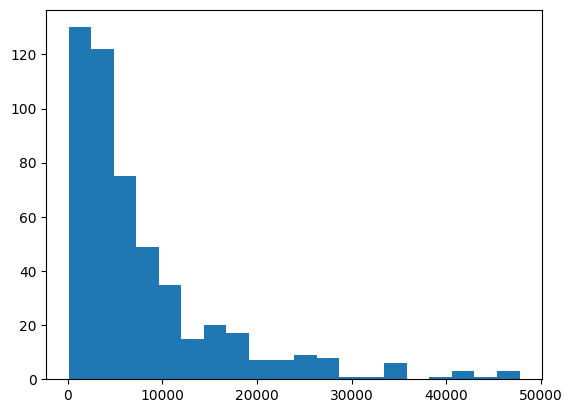

In [10]:
print(f'Average: {np.mean(doc_lens)}')
print(f'Max: {np.max(doc_lens)}')
_ = plt.hist(doc_lens, bins = 20)

### After segmentation statistics to show clause spasity
Get
- ave number of paragrahs, ave token num of paragraph, 
- percent of paras w/o key clause
- average of clause exist rate: for each clause, get how many cont it exists. then average

In [11]:
para_data = load_jsonl('data/cuad_clean/merge_split/paras_llama3_512.jsonl')

In [15]:
para_data[0]['paras'][0].keys()

dict_keys(['text', 'offset', 'qas', 'old_para_idx'])

In [21]:
ave_n_para = np.mean([len(k['paras']) for k in para_data])
print(f'Ave num para. per doc. {ave_n_para}')
ave_n_words = np.mean([len(para['text'].split()) for k in para_data for para in k['paras']])
print(f'Ave num words per para. {ave_n_words}')

has_clause = [len(para['qas']) > 0 for k in para_data for para in k['paras']]
pct_has_c = np.sum(has_clause) / len(has_clause)
print(f'Pct has clause: {pct_has_c * 100:.2f}')


Ave num para. per doc. 65.49215686274509
Ave num words per para. 120.04643573545702
Pct has clause: 19.33


In [18]:
np.max([len(para['text'].split()) for k in para_data for para in k['paras']])

455

In [22]:
doc2clas = []
for doc in para_data:
    cla_ids = set()
    for para in doc['paras']:
        for qa in para['qas']:
            cla_ids.add(qa['q_id'])
    doc2clas.append(cla_ids)

In [26]:
ave_n_type = np.mean([len(k) for k in doc2clas])
print(f'Ave num of cla types: {ave_n_type}')

cla_count = Counter([c for k in doc2clas for c in k])
ave_cla_ratio = np.mean([v / 510 for v in cla_count.values()])
print(f'Ave cla ratio: {ave_cla_ratio*100:.2f}')
    

Ave num of cla types: 12.933333333333334
Ave cla ratio: 31.54


In [27]:
29 / 41

0.7073170731707317